In [4]:
import pickle, os, matplotlib
import matplotlib.pyplot as plt
# from matplotlib.colors import LinearSegmentedColormap
# from matplotlib.ticker import ScalarFormatter
import pandas as pd
import seaborn as sns
from matplotlib import gridspec
from collections import Counter
from matplotlib_venn import venn3, venn3_circles
import numpy as np
from matplotlib.patches import Rectangle

In [2]:
### Generate the label dictionary
dir_cohort = '../anno_ref/cohorts'
feature_type = 'histology'
df_feat = pd.read_csv(os.path.join(dir_cohort,feature_type+'.csv'))
dict_feat_np = dict(Counter(df_feat[feature_type]))
dict_feat_np = {k: v for k, v in sorted(dict_feat_np.items(), key=lambda item: item[1])}
lfeat = list(dict_feat_np)

In [5]:
# settings
plt.interactive(False)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def set_snsfont(s):
    sns.set(font_scale=s)
    sns.set_style("white")
set_snsfont(1)

# output directory
dir_in = '../manuscript/figures_data/'
dir_out = '../manuscript/figures/'

if not os.path.exists(dir_out):
    os.makedirs(dir_out)

***
### Heatmap for syn res

In [12]:
dir_out_fig4 = './figure4/'
dir_anlyze = '../mutsig_out/anlyze'

# Read the significant gene dataframe after FDR calculation
feature_type = 'histology';syn_nsyn = 'syn';run = 'cohort_090821';
df_syn = pd.read_csv(os.path.join(dir_out_fig4,feature_type+'.syn.df_all_forheatmap.'+run+'.csv'),\
index_col = 0)
df_syn['FDR'] = -np.log10(df_syn['FDR']) # Transform into log scale

In [13]:
### Sort by genes
df_pivot_syn = df_syn.pivot_table('FDR', index='gene', columns='feature')
for feat in lfeat:
    if feat not in df_pivot_syn.columns:
#         df_pivot_syn[feat] = float('NaN')
        print(f'No significant genes: {feat}')
df_pivot_syn['n_sig_gene'] = df_pivot_syn.notnull().sum(axis=1)
df_pivot_gene_syn = df_pivot_syn.sort_values(by = 'n_sig_gene', ascending = False)
df_pivot_gene_syn = df_pivot_gene_syn.iloc[:, 0:-1]

No significant genes: Bone-Benign
No significant genes: Cervix-AdenoCA
No significant genes: Myeloid-MDS
No significant genes: Breast-DCIS
No significant genes: Bone-Osteoblast
No significant genes: Bone-Cart
No significant genes: Bone-Epith
No significant genes: Myeloid-AML
No significant genes: CNS-Oligo
No significant genes: Bladder-TCC
No significant genes: Myeloid-MPN
No significant genes: Biliary-AdenoCA
No significant genes: Bone-Osteosarc
No significant genes: Lung-AdenoCA
No significant genes: CNS-GBM
No significant genes: Kidney-ChRCC
No significant genes: Lung-SCC
No significant genes: Thy-AdenoCA
No significant genes: ColoRect-AdenoCA
No significant genes: Stomach-AdenoCA
No significant genes: Ovary-AdenoCA
No significant genes: CNS-Medullo
No significant genes: Kidney-RCC
No significant genes: Liver-HCC


In [16]:
def draw_heatmap(df):
    shape = df.shape
    fig, ax = plt.subplots(figsize = (shape[1]/3+3, shape[0]/3+2))
    cmap = plt.get_cmap("YlGnBu",30);cmap.set_under('white')
    ax = sns.heatmap(df,cmap=cmap,yticklabels=True,xticklabels=True,\
                     square=True,linewidth = 0.5,linecolor="grey", cbar_kws={"shrink": 0.3})
    ax.set_xlabel('Significant Genes'); ax.set_ylabel('Histology Cohort')
    # add patient number to ticks
    labels=[]
    for label in ax.get_yticklabels():
        feat = label.get_text()
        new_label =feat +  ' (n='+str(dict_feat_np[feat])+') '
        labels.append(new_label)
        label.set_ha("right")
    ax.set_yticklabels(labels)

    plt.tight_layout()
    plt.show()
    plt.close()

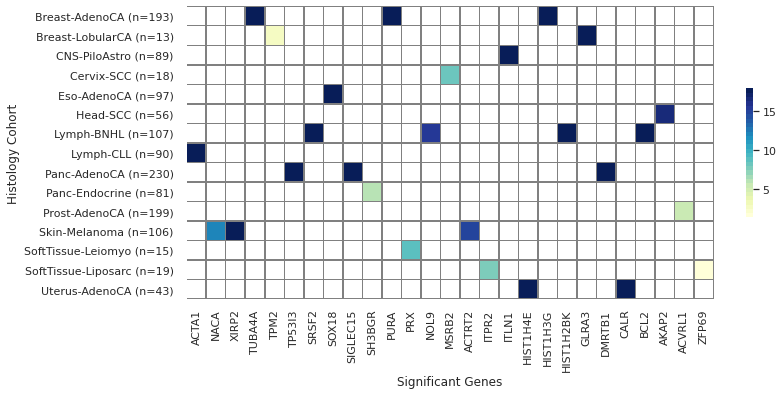

In [18]:
draw_heatmap(df_pivot_gene_syn.transpose())

***
### Candidate number between synonymous and non-synonymous

In [43]:
dir_out = './figure4'

feature_type = 'histology'; run = 'cohort_072221'
df_nsig_feat = pd.read_csv(os.path.join(dir_out, feature_type+'.syn_nsyn.'+run+'.nsig.csv'), index_col = 0)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


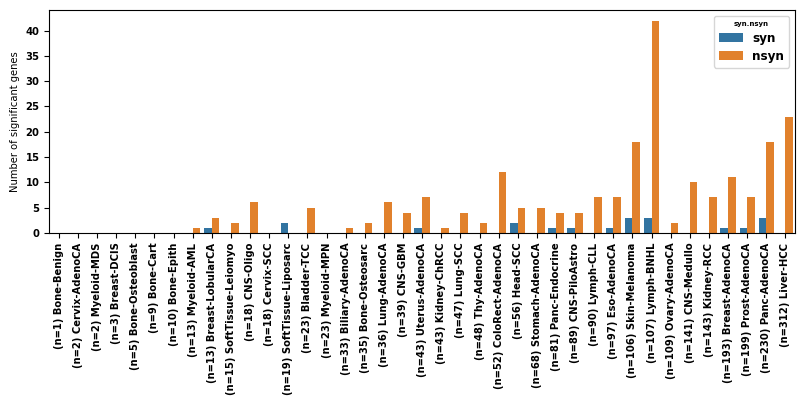

In [52]:
fig,ax = plt.subplots(figsize = (8,4))
ax = sns.barplot(x='index', y='nsig',hue = 'syn.nsyn' ,data=df)
plt.xticks(rotation = 90)
ax.set_ylabel('Number of significant genes'); ax.set_xlabel('')
plt.tight_layout()
plt.show()